# MA5790 - Assignment 4 - MM15B022 - R Mythreyi

In [1]:
%load_ext tikzmagic

The tikzmagic module is not an IPython extension.


In [2]:
%matplotlib inline

In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## Question 1

The Vandermonde Matrix

### Solution

The Leibnitz formula for determinants is given by:
$$
\det(A) = \sum_{\sigma \in S_n} \mathrm{sgn}({\sigma}) \prod_{i=1}^n a_{\sigma(i),i}
$$
where $A$ is a $n \times n$ matrix and $S_n$ is the set of all permutations of 1 to $n$ and each element of this set can be considered as a mapping of {1, $\ldots$, $n$} to {1, $\ldots$, $n$\}. From this formula, we can see that the determinant of the Vandermonde matrix ($V$) will involve the summation of $n!$ such terms each of which will be a product of some power of $x_0,  x_1, \ldots, x_n$. Thus, each of the terms will have an entry from each column of the matrix. Hence, the total degree of each term (and therefore the determinant) will be 
$$
1 + 2 + 3 + \ldots + n = \dfrac{n(n+1)}{2}
$$

If $x_i = x_j$ for $i \neq j$, two columns of the Vandermonde matrix will be equal. From properties of determinants, the determinant of a matrix where two columns are equal is 0.

Since $\det(V)$ is a polynomial in $x_0, x_1, \ldots, x_n$, using the above result, we can conclude from **Factor Theorem** that $(x_i - x_j)$ is a factor of $\det(V)$ Therefore, there are $\dfrac{n(n+1)}{2}$ such factors (all combinations of $i$ and $j$).

From the **Unique Factorisation Theorem** of multivariate polynomials, using the above result, we can conclude that:
$$
\det(V) = C \prod_{0 \leq i < j \leq n} (x_i - x_j)
$$
$C$ above is a constant because each term of the summation from Leibnitz formula is of the same degree $\dfrac{n(n+1)}{2}$ and there are $\dfrac{n(n+1)}{2}$ such factors.

To obtain the constant C, we can compare the coefficients of the first term in the Leibnitz formula (the product of all the diagonal terms) and the product from the factorisation. We get that the coefficient is **1**. Therefore, $C=1$.

Hence, 
$$
\det(V) = \prod_{0 \leq i < j \leq n} (x_i - x_j)
$$

## Question 2

Implementing Lagrangian Interpolation and nodes selection

### Solution

The condition number grows exponentially


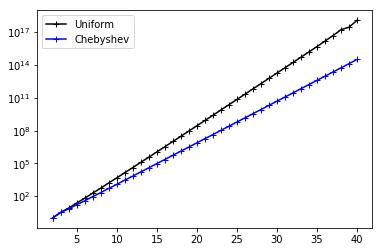

In [4]:
import numpy as np;
import matplotlib.pylab as pl;
from numpy import linalg

Nmax = 41;
N = np.arange(2,Nmax);
c_unif = np.zeros(Nmax-2);
c_cheb = np.zeros(Nmax-2);
for n in N:
    x_unif = np.linspace(-1,1,n);
    x_cheb  = np.sin(x_unif*np.pi/2);
    V_unif = np.vander(x_unif,increasing="True");
    V_cheb = np.vander(x_cheb,increasing="True");
    c_unif[n-2] = np.linalg.cond(V_unif);
    c_cheb[n-2] = np.linalg.cond(V_cheb);
    
pl.semilogy(N,c_unif,'k-+',label="Uniform");
pl.semilogy(N,c_cheb,'b-+',label="Chebyshev");
pl.legend();

print("The condition number grows exponentially")

Uniform 0.4383526205418032 for 5 nodes.
Chebyshev 0.4599776866404771 for 5 nodes.
Uniform 0.30028112979258054 for 10 nodes.
Chebyshev 0.3190952547347714 for 10 nodes.
Uniform 8.575632651449048 for 20 nodes.
Chebyshev 0.044954647689425586 for 20 nodes.
Uniform 83010.3304467772 for 50 nodes.
Chebyshev 0.001787996782250903 for 50 nodes.


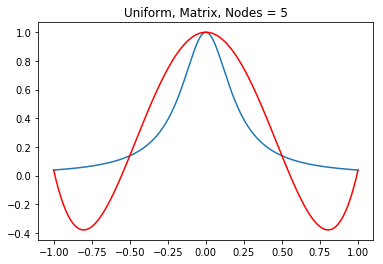

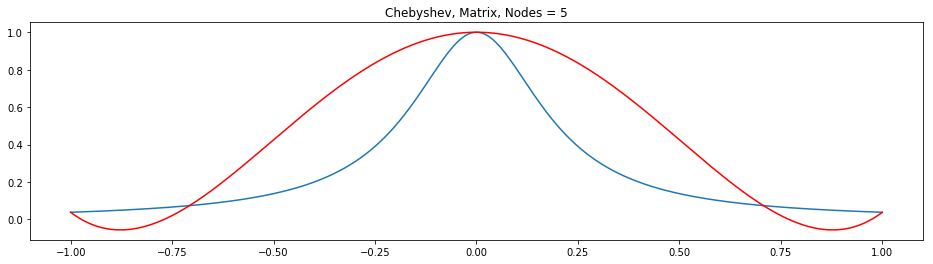

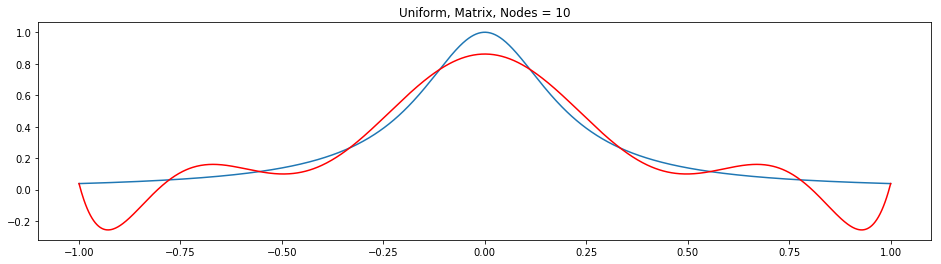

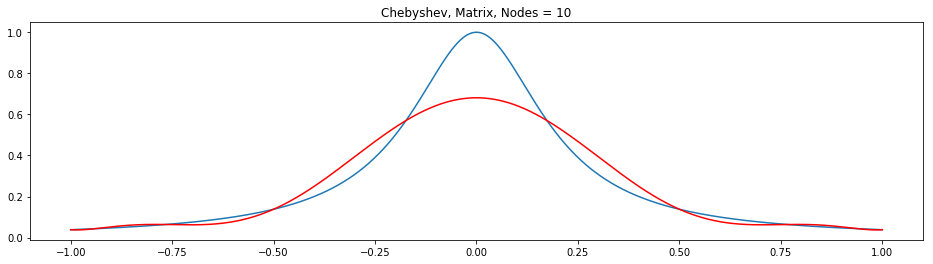

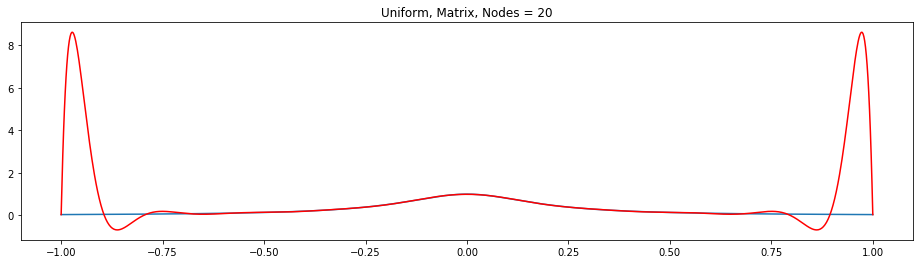

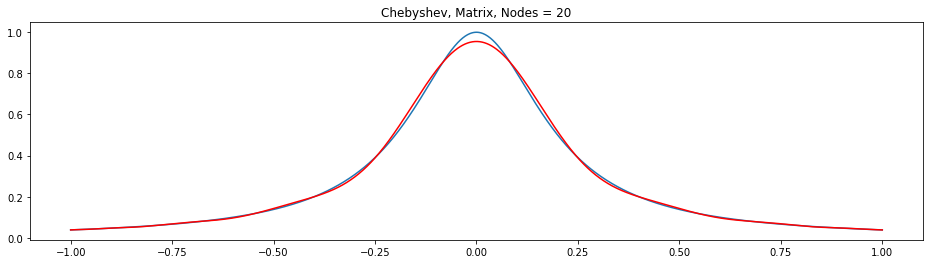

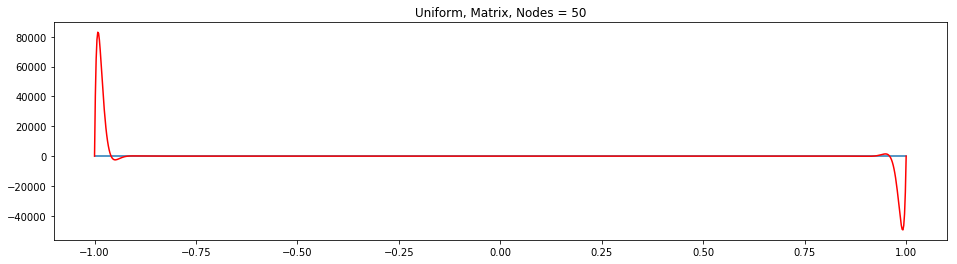

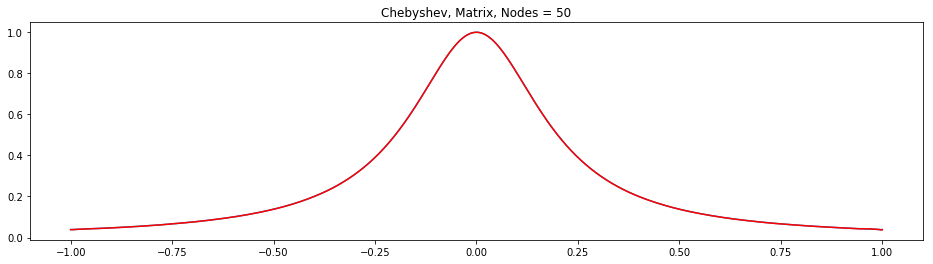

In [5]:
# Using Vandermonde Matrices
def function(x):
    f = 1.0/(1+25*x*x);
    return f;

def Chebyshev(nnodes,xplot):
    # Chebyshev node interpolation using Vandermonde Matrix
    x_unif = np.linspace(-1,1,nnodes);
    xnodes  = np.sin(x_unif*np.pi/2);
    V_cheb = np.vander(xnodes,increasing="True");
    fnodes   = function(xnodes);
    coeffs = np.linalg.solve(V_cheb,fnodes)
    fplot = 0
    for i in range(0,nnodes):
        fplot = fplot + coeffs[i]*(xplot**(i));
    return xnodes, fnodes, fplot;

def Uniform(nnodes,xplot):
    # Uniform node interpolation using Vandermonde Matrix
    xnodes = np.linspace(-1,1,nnodes);
    V_unif = np.vander(xnodes,increasing="True");
    fnodes   = function(xnodes);
    coeffs = np.linalg.solve(V_unif,fnodes)
    fplot = 0
    for i in range(0,nnodes):
        fplot = fplot + coeffs[i]*(xplot**(i));
    return xnodes, fnodes, fplot;

nplot       = 1001;
xplot       = np.linspace(-1,1,nplot);
f_actual   = function(xplot);
nnodes_all    = [5,10,20,50];
for nnodes in nnodes_all:
    xnodes, fnodes, fplot = Uniform(nnodes,xplot);

    error       = f_actual-fplot;
    print("Uniform",np.amax(np.abs(error)),"for",nnodes,"nodes.")
    pl.figure()
    pl.plot(xplot,f_actual,'-');
    pl.plot(xplot,fplot,'r');
    pl.title("Uniform, Matrix, Nodes = %i" %nnodes)
    pl.rcParams["figure.figsize"] = [16,4];

    xnodes, fnodes, fplot = Chebyshev(nnodes,xplot);
    error       = f_actual-fplot;
    print("Chebyshev",np.amax(np.abs(error)),"for",nnodes,"nodes.")
    pl.figure()
    pl.title("Chebyshev, Matrix, Nodes = %i" %nnodes)
    pl.plot(xplot,f_actual,'-');
    pl.plot(xplot,fplot,'r');
    pl.rcParams["figure.figsize"] = [16,4];

Uniform 0.43835262054180296 for 5 nodes.
Chebyshev 0.45997768664047717 for 5 nodes.
Uniform 0.30028112979256866 for 10 nodes.
Chebyshev 0.3190952547347732 for 10 nodes.
Uniform 8.575632648550263 for 20 nodes.
Chebyshev 0.04495464768853019 for 20 nodes.
Uniform 660522.8807567537 for 50 nodes.
Chebyshev 0.000115958453948517 for 50 nodes.


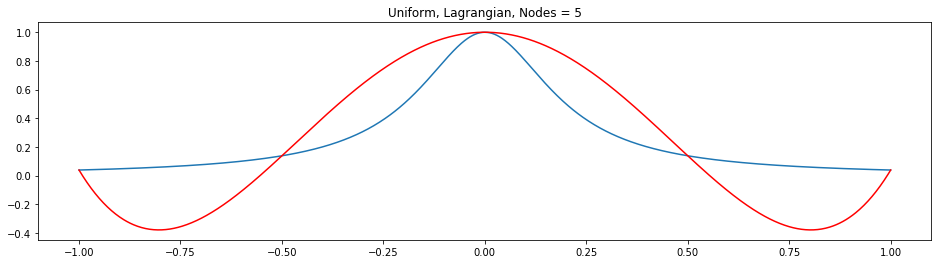

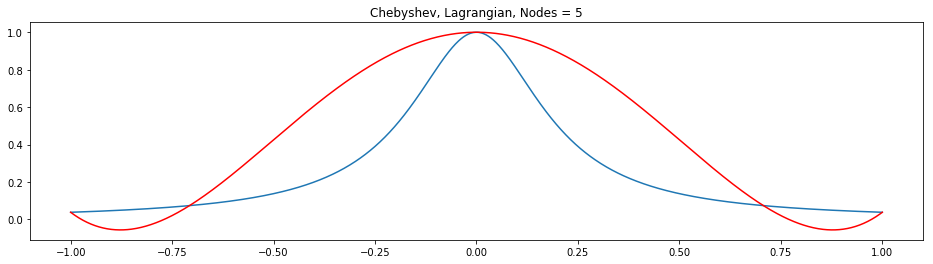

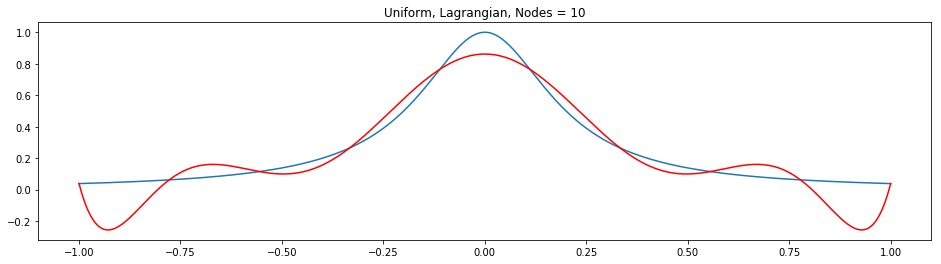

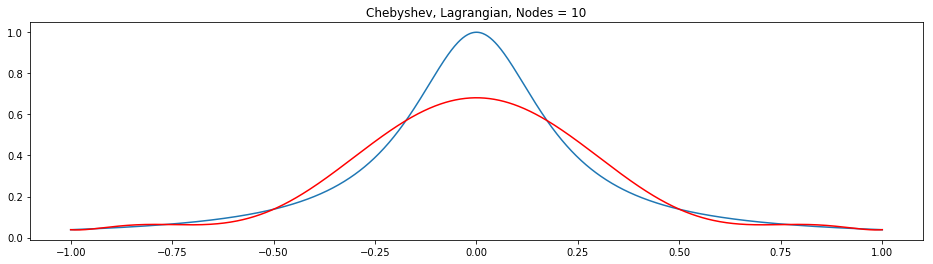

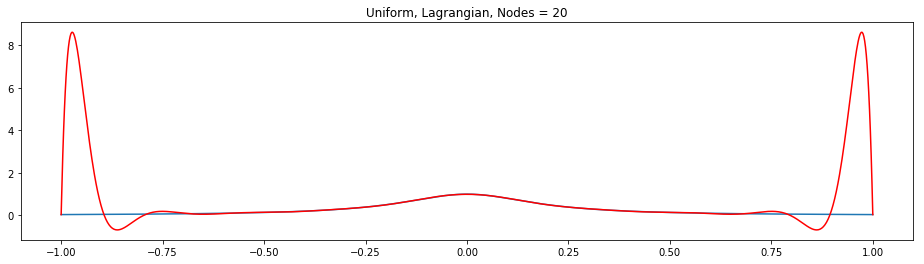

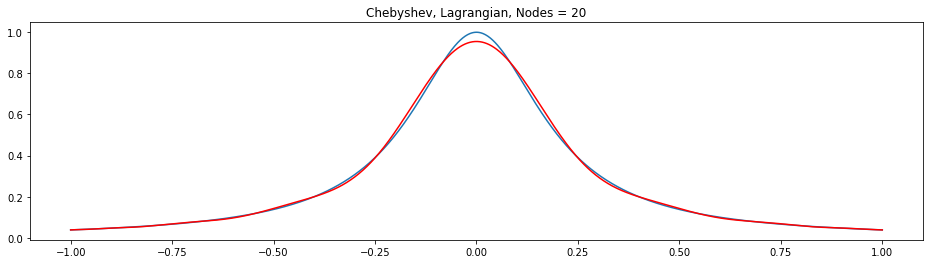

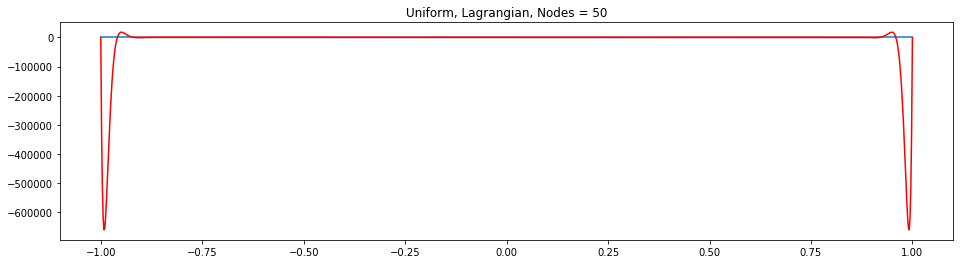

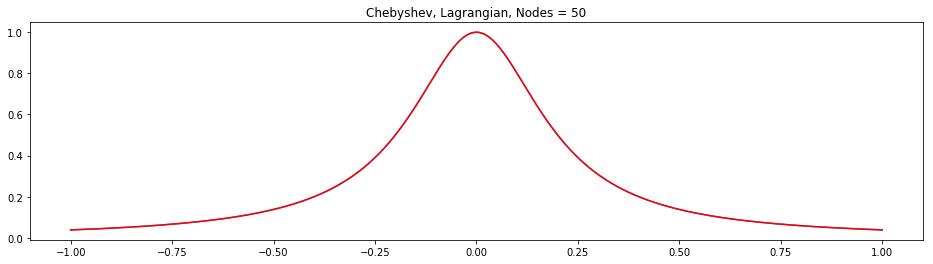

In [6]:
# Using Lagrangian polymials
def function(x):
    f = 1.0/(1+25*x*x);
    return f;

def Lagrange(xnodes,x,i):
    f = 1;
    nnodes = np.size(xnodes);
    for j in range(0,i):
        f = f*(x-xnodes[j])/(xnodes[i]-xnodes[j]);
    for j in range(i+1,nnodes):
        f = f*(x-xnodes[j])/(xnodes[i]-xnodes[j]);
    return f;

def Chebyshev(nnodes,xplot):
    # Chebyshev node interpolation using fundamental Lagrangian polynomials
    xnodes    = np.cos(np.arange(0,nnodes)*np.pi/(nnodes-1));
    fnodes     = function(xnodes);
    fplot        = 0;
    for i in range(0,nnodes):
        fplot = fplot + fnodes[i]*Lagrange(xnodes,xplot,i);
    return xnodes, fnodes, fplot;

def Uniform(nnodes,xplot):
    # Uniform node interpolation using fundamental Lagrangian polynomials
    xnodes    = np.linspace(-1,1,nnodes);
    fnodes     = function(xnodes);
    fplot        = 0;
    for i in range(0,nnodes):
        fplot = fplot + fnodes[i]*Lagrange(xnodes,xplot,i);
    return xnodes, fnodes, fplot;

nplot       = 1001;
xplot       = np.linspace(-1,1,nplot);
f_actual   = function(xplot);
nnodes_all    = [5,10,20,50];
for nnodes in nnodes_all:
    xnodes, fnodes, fplot = Uniform(nnodes,xplot);
    error       = f_actual-fplot;
    print("Uniform",np.amax(np.abs(error)),"for",nnodes,"nodes.")
    pl.figure()
    pl.title("Uniform, Lagrangian, Nodes = %i" %nnodes)
    pl.plot(xplot,f_actual,'-');
    pl.plot(xplot,fplot,'r');
    pl.rcParams["figure.figsize"] = [16,4];

    
    xnodes, fnodes, fplot = Chebyshev(nnodes,xplot);
    error   = f_actual-fplot;
    print("Chebyshev",np.amax(np.abs(error)),"for",nnodes,"nodes.")
    pl.figure();
    pl.title("Chebyshev, Lagrangian, Nodes = %i" %nnodes)
    pl.plot(xplot,f_actual,'-');
    pl.plot(xplot,fplot,'r');
    pl.rcParams["figure.figsize"] = [16,4];

The interpolating polynomial is unique, therefore, both the methods should give the same polynomial in principle (for a set of nodes). However, because of the poor conditioning of the Vandermonde matrix, as the number of nodes increases, the polynomial coeffiencts are not accurate. This is evident even for 25 nodes and the errors are visible. Thus, the fundamental Lagrangian polynomials approach is better.

The cost of evaluating a the interpolation polynomial as a function of $n$ is $\mathcal{O}(n)$ for the matrix method. The cost of evaluation for the fundamental Lagrangian polynomial method is $\mathcal{O}(n^2)$ but with clever rearrangement, it can be done with an $\mathcal{O}(n)$ algorithm. The precomputation step is $\mathcal{O}(n^3)$ for the matrix method and $\mathcal{O}(n^2)$ when using Lagrangian polynomial method. 

Obtaining the interpolating function is better using the fundamental Lagrangian polynomials method. Vandermonde matrix method has issues with ill-conditioning and it is also expensive.

## Question 3

Proving that: 
$$
\sum_{j=0}^n = x_j^m l_j(x) = x^m \;\;\;\forall\;\; m \in \{0, 1, \ldots, n\}
$$

### Solution

Consider a function:
$$
\phi(x) = \sum_{j=0}^n x_j^m l_j(x) - x^m
$$
We know that by definition:
$$
l_j(x_i) = \delta_{ij}
$$
where $\delta_{ij}$ is the Kronecker delta function.

Using this result, from substituting $x_j$ in $\phi(x)$, we get:

$$
\phi(x_j) = x_j^m - x_j^m = 0
$$

Hence, we can conclude that $\phi(x)$ goes to zero at all the $n+1$ grid points (irrespective of the type of grid points chosen). But, $\phi(x)$, by definition is a polynomial of degree $m \leq n$. A non-zero polynomial of degree $\leq n+1$ cannot have $(n+1)$ distinct roots. Hence, $\phi(x) = 0$. QED. 

The given problem is the mathematical representation of the property that lagrangian polynomials interpolate any polynomial of degree $\leq n$ exactly.

## Question 4

If $H^\alpha([-1,1])$ is the set of Hölder continuous functions for $\alpha$, given $\alpha < \beta$, prove that $H^\beta([-1,1]) \subset H^\alpha([-1,1])$

### Solution

This is a result from functional analysis and the Ascoli-Arzelà theorem.

The relation between the constants in the Hölder condition for a function in $H^\beta([-1,1])$ that's also in $H^\alpha([-1,1])$ can be understood easily for some part of the domian. If $f \in H^\alpha([-1,1])$, then $|f(x) - f(y)| < C |x-y|^\alpha$. Since $x,y \in [0,1]$, $|x-y| \in [0,2]$. Considering the part where $|x-y| \in [0,1]$, since $\alpha < \beta$, $|x-y|^\alpha > |x-y|^\beta$. Hence the same constant $C$ will satisfy both the conditions $|f(x) - f(y)| < C |x-y|^\alpha$ and $|f(x) - f(y)| < C |x-y|^\beta$.

$$
\dfrac{|f(x) - f(y)|}{|x-y|^\alpha} = \left(\dfrac{|f(x) - f(y)|}{|x-y|^\beta}\right)^\frac{\alpha}{\beta} |f(x) - f(y)|^{1 - \frac{\alpha}{\beta}} = o(1)
$$

## Question 5

Examples and proofs

### Solution 

### (a) Continuous but not Hölder continuous

Let $f(x) = \sum_{n=1}^\infty n^{-2} \sin(\pi q_n x)$
where $q_n$ is an increasing sequence of integers such that $2q_n$ divides $q_{n+1}$. The series converges to a continuous function uniformly. 

Consider $f(x) = \sum_{n=1}^N n^{-2} \sin(\pi q_n x)$, where $\max_{x \in [0,1]} |f_N'(x)| \le \sum_{n=1}^N n^{-2} \pi q_n \le B q_N$ where $B$ is a constant independent of $N$.

A function $f$ is not Hölder continuous for any $\alpha$ is for every $C$ and every $x$, there exist $s,t$ such that $s \leq x \leq t$ and $|f(t) - f(s)| > C(t-s)^\alpha$

### (b) Lipchitz but not differentiable

$f(x) = |x|$ 

$f$ is not differentiable at $x=0$ but it is Lipchitz continuous.

### (c) Differentiable but derivative is not continuous

$
f(x) = \begin{cases}
0 & \text{if }x=0 \\
x^2 sin(\frac{1}{x}) & \text{if }x \neq 0
\end{cases}
$

By Sandwich Theorem, $f$ is differentiable at all points. 

However, 
$
f'(x) = 2x sin(\frac{1}{x}) - cos(\frac{1}{x})
$
and $\lim_{x\rightarrow0} cos(\frac{1}{x})$ doesn't exist though $\lim_{x\rightarrow0} 2x sin(\frac{1}{x}) = 0$. 